In [2]:
import pypsa
import yaml
import pypsa
import warnings
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from datetime import datetime
from cartopy import crs as ccrs
from pypsa.plot import add_legend_circles, add_legend_lines, add_legend_patches
import os
import xarray as xr
import cartopy
import matplotlib.ticker as ticker

In [3]:
model = pypsa.Network('C:/Users/hie/pe_tan/pypsa-earth/results/2040_s2/networks/elec_s_all_ec_lcopt_1h.nc')

regions_onshore = gpd.read_file("C:/Users/hie/pe_tan/pypsa-earth/resources/2040_s2/shapes/country_shapes.geojson")
country_coordinates = regions_onshore.total_bounds[[0, 2, 1, 3]]
warnings.simplefilter(action='default', category=FutureWarning)

INFO:pypsa.io:Imported network elec_s_all_ec_lcopt_1h.nc has buses, carriers, generators, lines, loads, storage_units


In [4]:
lines = model.lines
buses = model.buses
generators = model.generators
generators_t = model.generators_t
load=model.loads
buses=model.buses





In [5]:
#model.export_to_csv_folder('C:/Users/hie/pe_tan/pypsa-earth/resources/2040_s2')

In [6]:
red1 = '#891D2D'
red2 = '#BA3B31'
orange = '#F58221'
yellow = '#FCAF19'
brown = '#440A15'
brown2 = '#B45419'
purple1 = '#3B1053'
purple2 = '#76518E'
purple3 = '#B69DC7'
teal1 = '#032838'
teal2 = '#154655'
teal3 = '#527D77'
teal4 = '#8DB5AF'
teal1 = '#294839'
green1 = '#6DA08C'
green2 = '#6E966E'
green3 = '#A3BDA3'
beige1 = '#7A693B'
beige2 = '#A89677'
beige3 = '#D2CDAD'
grey1 = '#E7E7E7'
grey2 = '#D7D7D7'
grey3 = '#C6C6C6'
grey4 = '#939393'
blue1 = '#3EA1C0'


custom_colors = {
    "Biomass": "#0c6013",
    "Hydropower": teal4,
    'Reservoir & Dam': teal4,
    'Run of River': 'lightsteelblue',
    "Hydro": teal4,
    "Natural Gas": brown2,
    "Natural gas": brown2,
    'Combined-Cycle Gas': brown2,
    "CCGT": brown2,
    "Open-Cycle Gas": brown,
    "Diesel and HFO": grey4,
    "Oil": grey4,
    "Solar Pv": "#f9d002",
    "Solar": "#f9d002",
    "Wind": teal2,
    "Onshore Wind": teal2,
    "Coal": "#707070",
    "Biofuels": "#06540d",
    "Kerosene": grey4,
    "Electricity": yellow,
    "Charcoal": brown2,
    "Gas": beige1,
    "Other": teal1,
    "Geothermal": teal3,
}

In [7]:
model.statistics()

Optimal Capacity  Installed Capacity  \
Generator   Coal                    4.299999e+03        6.000000e+02   
            Combined-Cycle Gas      6.199987e+03        1.192700e+03   
            Geothermal              9.950000e+02        1.350000e+02   
            Onshore Wind            1.370000e+03        9.110670e-01   
            Open-Cycle Gas          1.850000e+02        1.850000e+02   
            Run of River            6.017862e+02        6.017862e+02   
            Solar                   3.000000e+03        1.447219e+01   
            load                    6.700000e+10        6.700000e+10   
Line        AC                      8.656331e+04        3.477151e+04   
Load        -                       0.000000e+00        0.000000e+00   
StorageUnit Reservoir & Dam         4.340626e+03        4.340626e+03   

                                      Supply    Withdrawal      Dispatch  \
Generator   Coal                3.716509e+07  0.000000e+00  3.716509e+07   
            Combined-Cycle Gas  2.037650e+07  0.000000e+00  2.037650e+07   
            Geothermal          8.709348e+06  0.000000e+00  8.709348e+06   
            Onshore Wind        1.022072e+06  0.000000e+00  1.022072e+06   
            Open-Cycle Gas      3.081847e+03  0.000000e+00  3.081847e+03   
            Run of River        2.941126e+06  0.000000e+00  2.941126e+06   
            Solar               3.511654e+06  0.000000e+00  3.511654e+06   
            load                5.106293e+06  0.000000e+00  5.106293e+06   
Line        AC                  3.545615e+08  3.545615e+08  0.000000e+00   
Load        -                   0.000000e+00  9.714393e+07 -9.714393e+07   
StorageUnit Reservoir & Dam     1.830876e+07  0.000000e+00  1.830876e+07   

                                Transmission  Capacity Factor    Curtailment  \
Generator   Coal                0.000000e+00         0.986649       0.000000   
            Combined-Cycle Gas  0.000000e+00         0.375176       0.000000   
            Geothermal          0.000000e+00         0.999214       0.000000   
            Onshore Wind        0.000000e+00         0.085164  215012.424085   
            Open-Cycle Gas      0.000000e+00         0.001902       0.000000   
            Run of River        0.000000e+00         0.557914   44066.178261   
            Solar               0.000000e+00         0.133625  864653.783654   
            load                0.000000e+00         0.000009       0.000000   
Line        AC                 -5.702554e+07         0.467578       0.000000   
Load        -                   0.000000e+00              NaN       0.000000   
StorageUnit Reservoir & Dam     0.000000e+00         0.481507       0.000000   

                                Capital Expenditure  Operational Expenditure  \
Generator   Coal                       1.898446e+09             1.197549e+09   
            Combined-Cycle Gas         7.823257e+08             9.538849e+08   
            Geothermal                 0.000000e+00             8.241921e+04   
            Onshore Wind               1.775254e+08             2.548119e+04   
            Open-Cycle Gas             1.090340e+07             1.993759e+05   
            Run of River               2.465120e+08             3.027240e+04   
            Solar                      1.448679e+08             6.786748e+04   
            load                       0.000000e+00             4.085039e+13   
Line        AC                         5.048422e+08             0.000000e+00   
Load        -                          0.000000e+00             0.000000e+00   
StorageUnit Reservoir & Dam            0.000000e+00             1.778088e+05   

                                     Revenue  Market Value  
Generator   Coal                3.597523e+10  9.679843e+02  
            Combined-Cycle Gas  5.055883e+10  2.481232e+03  
            Geothermal          8.368184e+09  9.608278e+02  
            Onshore Wind        4.861382e+12  4.756399e+06  
            Open-Cycle Gas 

In [8]:
model.generators

,carrier,bus,p_nom_min,p_nom,p_nom_extendable,efficiency,marginal_cost,capital_cost,build_year,lifetime,...,q_set,marginal_cost_quadratic,committable,start_up_cost,shut_down_cost,stand_by_cost,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
Generator,,,,,,,,,,,,,,,,,,,,,
C31,CCGT,2,102.0,1.020000e+02,True,0.58,46.813041,126181.845894,2007,20.0,...,0.0,0.0,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
C32,CCGT,2,189.0,1.890000e+02,True,0.58,46.813913,126181.845894,2006,20.0,...,0.0,0.0,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
C33,CCGT,2,129.0,1.290000e+02,True,0.58,46.812501,126181.845894,2011,25.0,...,0.0,0.0,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
C34,CCGT,2,150.0,1.500000e+02,True,0.58,46.812533,126181.845894,2015,25.0,...,0.0,0.0,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
C35,CCGT,2,248.2,2.482000e+02,True,0.58,46.813154,126181.845894,2018,-5.0,...,0.0,0.0,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80 load,load,80,0.0,1.000000e+09,False,1.00,8000.010980,0.000000,0,inf,...,0.0,0.0,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
81 load,load,81,0.0,1.000000e+09,False,1.00,8000.009587,0.000000,0,inf,...,0.0,0.0,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0
82 load,load,82,0.0,1.000000e+09,False,1.00,8000.009900,0.000000,0,inf,...,0.0,0.0,False,0.0,0.0,0.0,NaN,NaN,1.0,1.0


In [9]:
grouped_generators=model.generators.groupby(by=model.generators.p_nom).sum()
grouped_generators

,carrier,bus,p_nom_min,p_nom_extendable,efficiency,marginal_cost,capital_cost,build_year,lifetime,p_nom_max,...,q_set,marginal_cost_quadratic,committable,start_up_cost,shut_down_cost,stand_by_cost,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
p_nom,,,,,,,,,,,,,,,,,,,,,
0.000000e+00,solarsolarsolarsolarsolarsolarsolarsolarsolars...,2710212229333437404146495254555657657174767982...,0.000000,87,87.00,2.048171,9.241226e+06,0,inf,9.737407e+05,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,87.0,87.0
1.001129e-01,solar,69,0.100113,1,1.00,0.020268,4.828930e+04,0,inf,8.712668e+03,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1.056758e-01,solar,23,0.105676,1,1.00,0.020215,4.828930e+04,0,inf,8.842307e+03,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1.139728e-01,solar,18,0.113973,1,1.00,0.019134,4.828930e+04,0,inf,1.009739e+04,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1.195508e-01,solar,53,0.119551,1,1.00,0.019603,4.828930e+04,0,inf,1.049737e+04,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.890000e+02,CCGT,2,189.000000,1,0.58,46.813913,1.261818e+05,2006,20.0,inf,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2.482000e+02,CCGT,2,248.200000,1,0.58,46.813154,1.261818e+05,2018,-5.0,inf,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3.000000e+02,CCGT,40,300.000000,1,0.58,46.813381,1.261818e+05,2026,25.0,inf,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [10]:
grouped_generators=model.generators.groupby(by=model.generators.carrier).sum()
grouped_generators

,bus,p_nom_min,p_nom,p_nom_extendable,efficiency,marginal_cost,capital_cost,build_year,lifetime,p_nom_max,...,q_set,marginal_cost_quadratic,committable,start_up_cost,shut_down_cost,stand_by_cost,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
carrier,,,,,,,,,,,,,,,,,,,,,
CCGT,222223740404140,1192.700000,1.192700e+03,10,5.80,468.132055,1.261818e+06,20126,203.0,inf,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,10.0,10.0
OCGT,2,185.000000,1.850000e+02,0,0.41,64.693644,5.893728e+04,2027,20.0,inf,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
coal,42,600.000000,6.000000e+02,1,0.33,32.222424,4.414993e+05,2031,25.0,inf,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
geothermal,88328,135.000000,1.350000e+02,4,4.00,0.039592,0.000000e+00,8112,100.0,inf,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,4.0
load,2478101215161820212223252729303132333435363738...,0.000000,6.700000e+10,0,67.00,536000.667764,0.000000e+00,0,inf,inf,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,67.0,67.0
onwind,2478101215161820212223252729303132333435363738...,0.911067,9.110670e-01,67,67.00,1.674595,8.681896e+06,0,inf,1.269056e+06,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,67.0,67.0
ror,223636724920313142564247818131,0.000000,6.017862e+02,0,13.50,0.150548,6.144508e+06,0,inf,inf,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,15.0,15.0
solar,2478101215161820212223252729303132333435363738...,14.472187,1.447219e+01,67,67.00,1.333154,3.235383e+06,0,inf,1.282635e+06,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,67.0,67.0


In [ ]:
total_p_nom = model.generators['p_nom'].sum()


67000002729.8695

In [12]:
print(model.loads_t.p_set.sum())

Load
0     6.260559e+06
3     1.823867e+06
5     2.372770e+05
8     2.117637e+06
9     4.197371e+05
          ...     
80    7.672233e+05
81    3.331133e+06
82    7.165030e+04
83    6.153269e+05
84    2.699992e+06
Length: 67, dtype: float64


<AxesSubplot:xlabel='snapshot', ylabel='MW'>

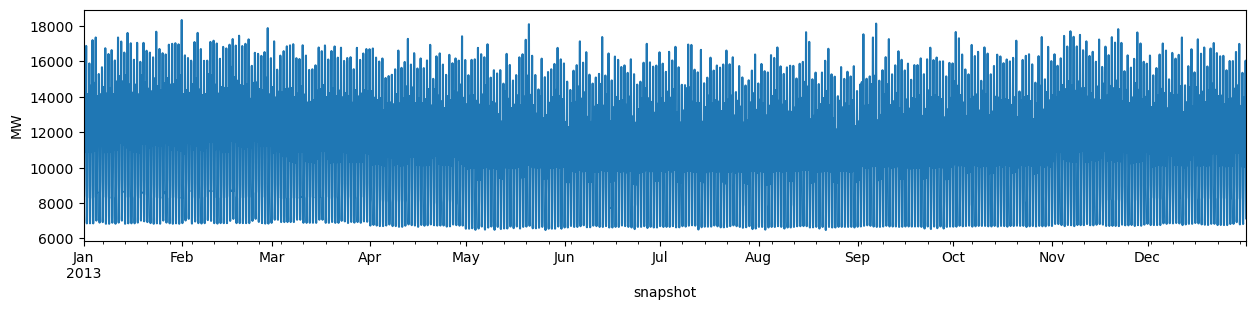

In [13]:
model.loads_t.p_set.sum(axis=1).plot(figsize=(15,3), ylabel="MW")

In [14]:
model.loads_t.p.sum()

Load
0     6.260559e+06
3     1.823867e+06
5     2.372770e+05
8     2.117637e+06
9     4.197371e+05
          ...     
80    7.672233e+05
81    3.331133e+06
82    7.165030e+04
83    6.153269e+05
84    2.699992e+06
Length: 67, dtype: float64

In [15]:
model.iplot(mapbox='osm')

{'data': [Scattermapbox({
      'lat': [-6.7116, -6.6413],
      'line': {'color': 'rosybrown', 'width': 3},
      'lon': [38.7439, 38.3689],
      'mode': 'lines',
      'opacity': 0.8
  }),
  Scattermapbox({
      'lat': [-5.3126, -4.0717],
      'line': {'color': 'rosybrown', 'width': 3},
      'lon': [38.6298, 37.7377],
      'mode': 'lines',
      'opacity': 0.8
  }),
  Scattermapbox({
      'lat': [-4.8396, -3.6219],
      'line': {'color': 'rosybrown', 'width': 3},
      'lon': [34.7573, 33.5148],
      'mode': 'lines',
      'opacity': 0.8
  }),
  Scattermapbox({
      'lat': [-8.8482, -8.9146],
      'line': {'color': 'rosybrown', 'width': 3},
      'lon': [34.8061, 33.4967],
      'mode': 'lines',
      'opacity': 0.8
  }),
  Scattermapbox({
      'lat': [-3.6219, -3.2208],
      'line': {'color': 'rosybrown', 'width': 3},
      'lon': [33.5148, 32.4905],
      'mode': 'lines',
      'opacity': 0.8
  }),
  Scattermapbox({
      'lat': [-3.861, -3.6219],
      'line': {'color'

c:\Users\hie\AppData\Local\anaconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning:

facecolor will have no effect as it has been defined as "never".



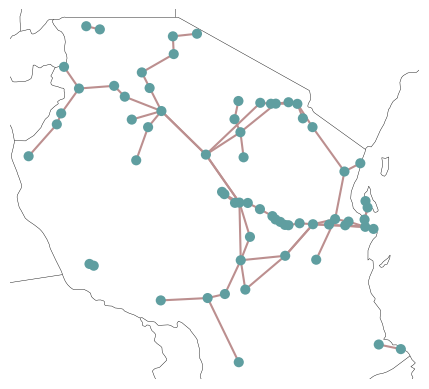

In [16]:
model.plot();


In [17]:
for c in model.iterate_components(list(model.components.keys())[2:]):
    print("Component '{}' has {} entries".format(c.name,len(c.df)))

Component 'Bus' has 67 entries
Component 'Carrier' has 13 entries
Component 'Line' has 73 entries
Component 'LineType' has 34 entries
Component 'TransformerType' has 14 entries
Component 'Load' has 67 entries
Component 'Generator' has 232 entries
Component 'StorageUnit' has 16 entries


In [18]:
model.lines

,v_nom,bus0,bus1,length,dc,geometry,bounds,carrier,type,s_max_pu,...,s_nom_max,lifetime,terrain_factor,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu
Line,,,,,,,,,,,,,,,,,,,,,
0,380.0,21,29,43.985476,False,"MULTILINESTRING ((38.7439 -6.7116, 38.74378869...",MULTIPOINT ((38.357321400000096 -6.63929209999...,AC,Al/St 240/40 4-bundle 380.0,0.9,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
1,380.0,36,30,181.143759,False,MULTILINESTRING ((38.61499740000011 -5.2978653...,MULTIPOINT ((37.73768980000001 -4.071734399999...,AC,Al/St 240/40 4-bundle 380.0,0.9,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
2,380.0,27,12,221.213747,False,"LINESTRING (34.7563 -4.8406, 34.75503799999999...","MULTIPOINT ((34.7563 -4.8406), (33.5148 -3.6219))",AC,Al/St 240/40 4-bundle 380.0,0.9,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
3,380.0,42,8,161.020453,False,MULTILINESTRING ((33.49678590000009 -8.9145849...,"MULTIPOINT ((33.4967 -8.9146), (33.49678590000...",AC,Al/St 240/40 4-bundle 380.0,0.9,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
4,380.0,12,35,129.558873,False,MULTILINESTRING ((32.49089980000009 -3.2207166...,"MULTIPOINT ((32.4905 -3.2208), (32.49089980000...",AC,Al/St 240/40 4-bundle 380.0,0.9,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,380.0,73,84,16.178887,False,MULTILINESTRING ((31.504323200000012 -7.895004...,"MULTIPOINT ((31.5043 -7.895), (31.504323200000...",AC,Al/St 240/40 4-bundle 380.0,0.9,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
69,380.0,74,83,36.740825,False,"MULTILINESTRING ((30.5913 -3.9936, 30.59131800...","MULTIPOINT ((30.5913 -3.9936), (30.7134 -3.687...",AC,Al/St 240/40 4-bundle 380.0,0.9,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
70,380.0,75,57,15.448316,False,"MULTILINESTRING ((36.6172 -6.5587, 36.61727609...","MULTIPOINT ((36.6172 -6.5587), (36.61727609999...",AC,Al/St 240/40 4-bundle 380.0,0.9,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0


In [19]:
model.storage_units

,carrier,bus,p_nom,max_hours,p_min_pu,efficiency_dispatch,efficiency_store,cyclic_state_of_charge,marginal_cost,build_year,...,sign,marginal_cost_quadratic,capital_cost,lifetime,state_of_charge_initial,state_of_charge_initial_per_period,state_of_charge_set,cyclic_state_of_charge_per_period,standing_loss,inflow
StorageUnit,,,,,,,,,,,,,,,,,,,,,
0 hydro,hydro,33,200.000000,212.872523,0.0,0.9,0.0,True,0.009920,0,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0
2 hydro,hydro,16,80.000000,212.872523,0.0,0.9,0.0,True,0.010793,0,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0
4 hydro,hydro,49,7.125972,212.872523,0.0,0.9,0.0,True,0.009380,0,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0
6 hydro,hydro,71,2115.000000,212.872523,0.0,0.9,0.0,True,0.009412,0,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0
7 hydro,hydro,80,27.000000,212.872523,0.0,0.9,0.0,True,0.010034,0,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0
8 hydro,hydro,81,300.000000,212.872523,0.0,0.9,0.0,True,0.009139,0,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0
9 hydro,hydro,23,358.000000,212.872523,0.0,0.9,0.0,True,0.010517,0,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0
11 hydro,hydro,8,90.100000,212.872523,0.0,0.9,0.0,True,0.010609,0,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0
12 hydro,hydro,8,81.600000,212.872523,0.0,0.9,0.0,True,0.010784,0,...,1.0,0.0,0.0,inf,0.0,False,NaN,True,0.0,0.0


Time varying components

<AxesSubplot:xlabel='snapshot'>

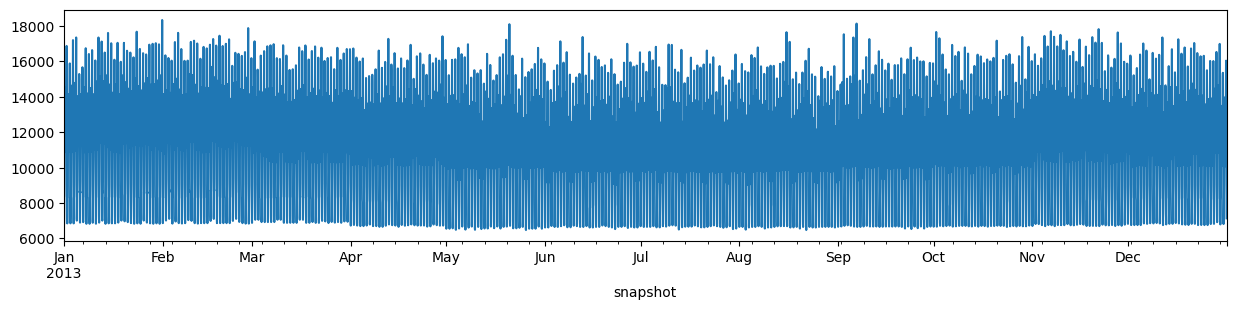

In [20]:
model.loads_t.p_set.sum(axis=1).plot(figsize=(15,3))  

Total annual system costs

In [21]:
model.objective/1e6 #million euroes per year

40855419.0966019

Transmission line expansion

In [22]:
model.lines.s_nom   #lines nominal capacities

Line
0      147.466806
1      147.466806
2      491.556019
3      491.556019
4      491.556019
         ...     
68      53.728216
69    1787.476433
70     491.556019
71     491.556019
72     147.466806
Name: s_nom, Length: 73, dtype: float64

In [23]:
model.lines.s_nom_opt #optimized transmission capacity expansion by x 

Line
0      510.430866
1      314.361237
2     1644.556426
3      491.572191
4     1606.109174
         ...     
68     521.342657
69    1790.807037
70     841.868909
71    1905.437143
72     872.089090
Name: s_nom_opt, Length: 73, dtype: float64

Optimal generator/storage

In [24]:
model.generators.groupby ('carrier').p_nom_opt.sum() #GW

carrier
CCGT          6.199987e+03
OCGT          1.850000e+02
coal          4.299999e+03
geothermal    9.950000e+02
load          6.700000e+10
onwind        1.370000e+03
ror           6.017862e+02
solar         3.000000e+03
Name: p_nom_opt, dtype: float64

In [25]:
model.storage_units.groupby ('carrier').p_nom_opt.sum() #MW

carrier
hydro    4340.625972
Name: p_nom_opt, dtype: float64

<AxesSubplot:xlabel='snapshot'>

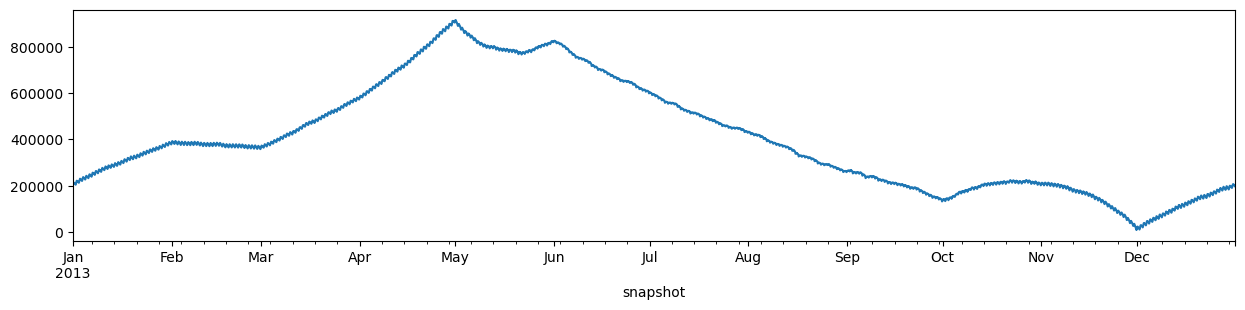

In [26]:
(model.storage_units_t.state_of_charge.filter(like='hydro',axis=1).sum(axis=1)).plot(figsize=(15,3))

In [27]:
#lost load
# Calculate lost load
lost_load = model.generators_t.p.loc[:, model.generators[model.generators.carrier == "load"].index]

# Total lost load over the entire period (in MWh)
total_lost_load = lost_load.sum().sum()

# Peak lost load (maximum lost load at any time snapshot)
peak_lost_load = lost_load.max().max()

# Print results
print(f"Total Lost Load: {total_lost_load:.2f} MWh")
print(f"Peak Lost Load: {peak_lost_load:.2f} MW")

Total Lost Load: 5106292758.09 MWh
Peak Lost Load: 879846.72 MW


In [28]:
# Group lost load by bus
lost_load_by_bus = lost_load.sum(axis=0).groupby(model.generators.loc[model.generators.carrier == "load", "bus"]).sum()

# Print top buses with the highest lost load
print("Top buses by lost load:")
print(lost_load_by_bus.sort_values(ascending=False).head(10))

Top buses by lost load:
bus
73    2.901714e+09
18    1.072044e+09
38    4.856224e+08
62    3.881722e+08
55    1.148077e+08
20    9.510519e+07
56    2.837513e+07
84    2.035602e+07
49    2.587506e+04
30    1.534118e+04
dtype: float64


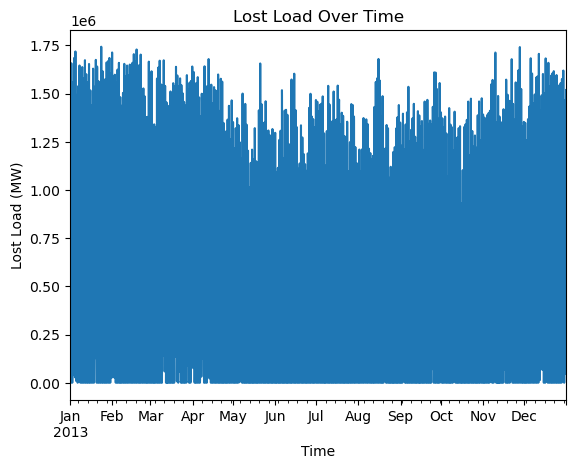

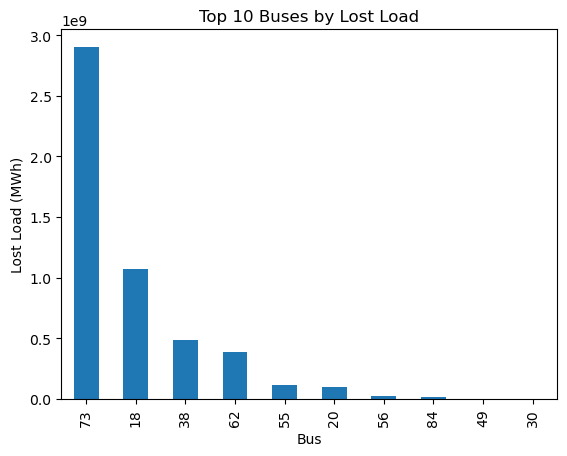

In [29]:
import matplotlib.pyplot as plt

#lost load over time
lost_load.sum(axis=1).plot(title="Lost Load Over Time", ylabel="Lost Load (MW)", xlabel="Time")
plt.show()

#lost lost per bus

lost_load_by_bus.sort_values(ascending=False).head(10).plot(kind="bar", title="Top 10 Buses by Lost Load", ylabel="Lost Load (MWh)", xlabel="Bus")
plt.show()

In [30]:
# #peak generation

# # Calculate total generation at each time step
# total_generation = model.generators_t.p.sum(axis=1)

# # Find the peak generation and its timestamp
# peak_generation = total_generatiomodel.model.max()
# peak_generation_time = total_generatiomodel.model.idxmax()

# # Print results
# print(f"Peak generation: {peak_generation:.2f} MW")
# print(f"Time of peak generation: {peak_generation_time}")


# # Plot total generation over time
# total_generatiomodel.model.plot(title="Total Generation Over Time", ylabel="Generation (MW)", xlabel="Time")


Peak demand: 18339.35 MW
Time of peak demand: 2013-01-31 19:00:00


<AxesSubplot:title={'center':'Total Demand Over Time'}, xlabel='Time', ylabel='Generation (MW)'>

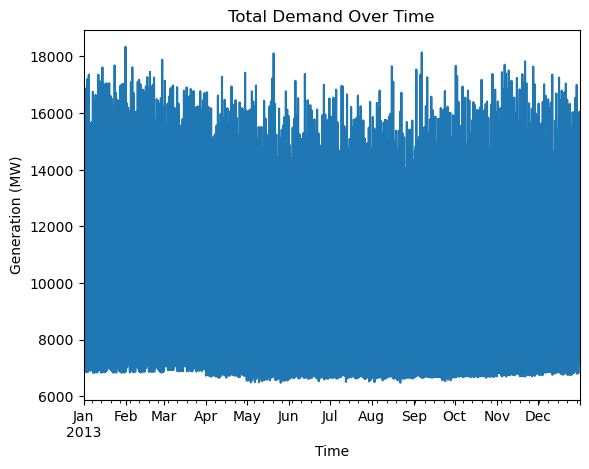

In [31]:
#peak demand
# Calculate total demand at each time step
total_demand = model.loads_t.p_set.sum(axis=1)

# Find the peak demand and its timestamp
peak_demand = total_demand.max()
peak_demand_time = total_demand.idxmax()

# Print results
print(f"Peak demand: {peak_demand:.2f} MW")
print(f"Time of peak demand: {peak_demand_time}")

# Plot total generation over time
total_demand.plot(title="Total Demand Over Time", ylabel="Generation (MW)", xlabel="Time")

Plotting networks with line loading

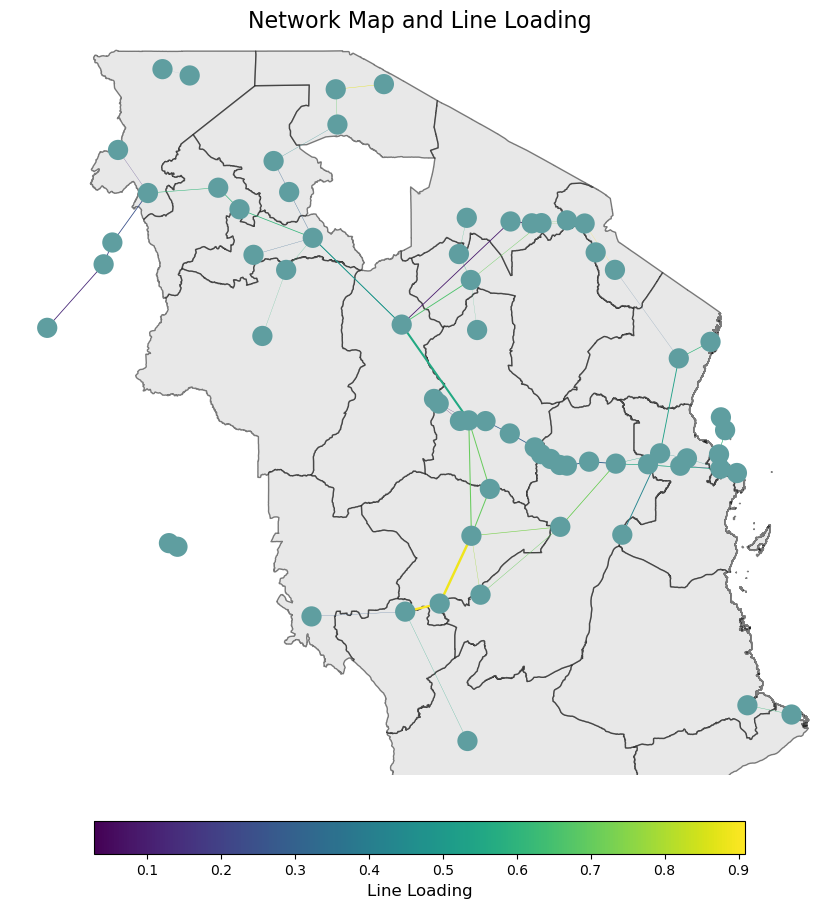

In [32]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

# Load GADM shapefile
gadm_path = "C:/Users/hie/pe_tan/pypsa-earth/resources/bus_regions/regions_onshore_elec_s_all.geojson"  # Replace with the actual path
gadm = gpd.read_file(gadm_path)

# Calculate line loading
loading = (
    (model.lines_t.p0.abs().mean().reindex(model.lines.index, fill_value=0) / 
    (model.lines.s_nom_opt * model.lines.s_max_pu).reindex(model.lines.index, fill_value=0))
    .fillna(0)
)



# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": ccrs.Mercator()})

# Plot the GADM shapefile
gadm.plot(ax=ax, edgecolor="black", facecolor="lightgray", alpha=0.5, transform=ccrs.PlateCarree())

# Plot the network
model.plot(
    ax=ax,
    branch_components=["Line"],  # Plot only lines
    line_widths=model.lines.s_nom_opt / 3e3,  # Scale line widths
    line_colors=loading,  # Color lines by loading
    color_geomap=False,  # Do not recolor the background
)

# Customize the plot
ax.set_title("Network Map and Line Loading", fontsize=16)
ax.axis("off")  # Turn off axis

# Add a colorbar for line loading
sm = plt.cm.ScalarMappable(cmap="viridis", norm=plt.Normalize(vmin=loading.min(), vmax=loading.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation="horizontal", pad=0.05, shrink=0.7)
cbar.set_label("Line Loading", fontsize=12)

# Show the plot
plt.show()

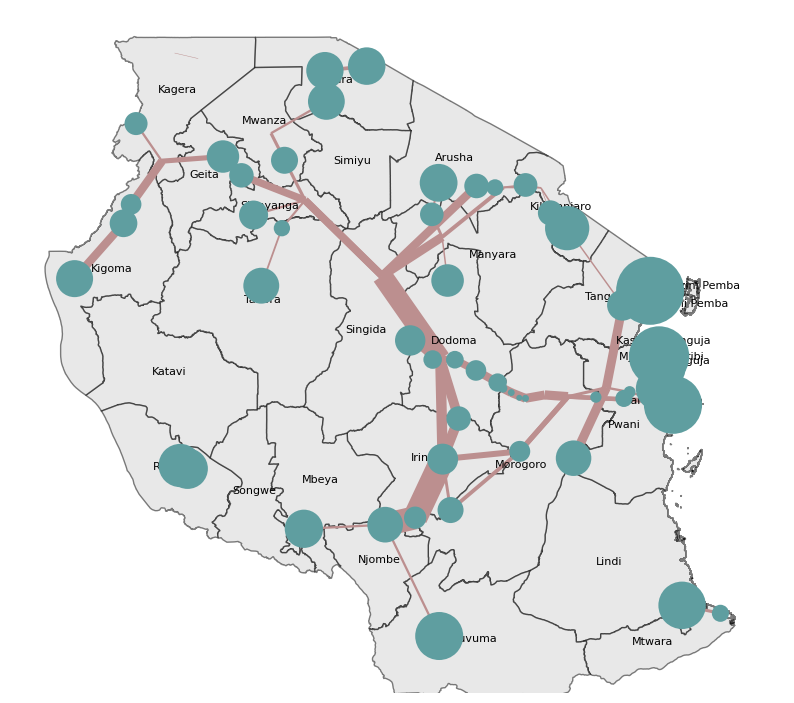

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
# Define the normalize_node_size function

max_node_size = 0.3 

def normalize_node_size(values, max_node_size=max_node_size):
    return values / values.max() * max_node_size

# Load GADM shapefile
gadm_path = r"C:/Users/hie/pe_tan/pypsa-earth/resources/2040_s2/shapes/gadm_shapes.geojson"
gadm = gpd.read_file(gadm_path)

# Normalize bus sizes based on load data
bus_sizes = model.loads_t.p_set.sum().rename("load").rename_axis("bus")

# Ensure bus_sizes indices align with model.buses.index
bus_sizes = bus_sizes[bus_sizes.index.isin(model.buses.index)]

# Normalize node sizes
bus_sizes = normalize_node_size(bus_sizes)

# Plot the network
fig, ax = plt.subplots(
    figsize=(10, 10),
    subplot_kw={"projection": ccrs.PlateCarree()},  # PlateCarree(default), Mercator, Orthographic
)

# Plot the GADM shapefile as a background
gadm.plot(ax=ax, edgecolor="black", facecolor="lightgray", alpha=0.5)

# Plot the network
model.plot(
    margin=0.1,
    ax=ax,  # Pass the axis to the plot function
    geomap=True,  # Enable geographic map
    projection=None,  # Use the default projection
    bus_colors="cadetblue",  # Color for buses
    bus_alpha=1,  # Transparency for buses
    bus_sizes=bus_sizes,  # Normalized bus sizes
    bus_cmap=None,  # No colormap for buses
    line_colors="rosybrown",  # Color for lines
    link_colors="darkseagreen",  # Color for links
    transformer_colors="orange",  # Color for transformers
    line_widths=model.lines.s_nom_opt / 3e2,  # Scale line widths
    link_widths=1.5,  # Fixed link widths
    transformer_widths=1.5,  # Fixed transformer widths
    line_cmap=None,  # No colormap for lines
    link_cmap=None,  # No colormap for links
    transformer_cmap=None,  # No colormap for transformers
    flow=None,  # No flow data
    branch_components=None,  # Use default branch components
    layouter=None,  # Use default layout
    title="",  # No title
    boundaries=None,  # Use default boundaries
    geometry=False,  # Disable geometry plotting
    jitter=None,  # No jitter
    color_geomap=False,  # Disable geographic map coloring (since GADM is used)
)

# Add region names from GADM
for _, row in gadm.iterrows():
    centroid = row.geometry.centroid
    ax.text(
        centroid.x, centroid.y, row["NAME_1"],  # Use the NAME_1 column for region names
        fontsize=8, color="black", ha="center", transform=ccrs.PlateCarree()
    )

# Turn off the axis
ax.axis("off")

# Show the plot
plt.show()

C:\Users\hie\AppData\Local\Temp\ipykernel_25036\3331414958.py:2: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\hie\AppData\Local\Temp\ipykernel_25036\3331414958.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy o

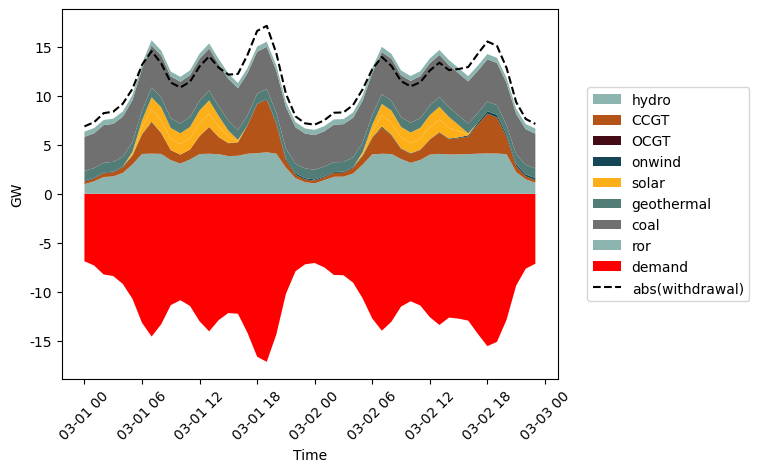

In [34]:
#dispatch optimized sustem
model.carriers.color['geothermal'] = teal3
model.carriers.color['ror'] = teal4
model.carriers.color['hydro'] = teal4
model.carriers.color['coal'] = "#707070"
model.carriers.color['CCGT'] = brown2
model.carriers.color['OCGT'] = brown
#model.carriers.color['oil'] = beige1
model.carriers.color['onwind'] = teal2
model.carriers.color['solar'] = yellow
#model.loads.color['load'] = beige1


first_date = "2013-03-01"
second_date = "2013-03-02"
CCGT = model.generators_t.p.loc[first_date:second_date].T.groupby(model.generators.carrier).sum().loc["CCGT"]
OCGT = model.generators_t.p.loc[first_date:second_date].T.groupby(model.generators.carrier).sum().loc["OCGT"]
Onwind = model.generators_t.p.loc[first_date:second_date].T.groupby(model.generators.carrier).sum().loc["onwind"]
solar = model.generators_t.p.loc[first_date:second_date].T.groupby(model.generators.carrier).sum().loc["solar"]
geothermal= model.generators_t.p.loc[first_date:second_date].T.groupby(model.generators.carrier).sum().loc["geothermal"]

coal = model.generators_t.p.loc[first_date:second_date].T.groupby(model.generators.carrier).sum().loc["coal"]

ror= model.generators_t.p.loc[first_date:second_date].T.groupby(model.generators.carrier).sum().loc["ror"]


hydro = model.storage_units_t.p.loc[first_date:second_date].T.groupby(model.storage_units.carrier).sum().loc["hydro"]

demand = model.loads_t.p_set.loc[first_date:second_date].sum(axis=1)*-1

# names for labels
demand.name = "demand"

fig, ax=plt.subplots()
 
plt.stackplot(
    CCGT.index,
    supply:=(hydro.where(hydro > 0, 0), CCGT, OCGT, Onwind,  solar, solar, geothermal, coal, ror), 
    labels=[key.name for key in supply],
    colors=[model.carriers.color.get(source.name, default="gray") for source in supply], 
    zorder = 99
)
plt.stackplot(
    CCGT.index,
    withdrawal:=(demand, hydro.where(hydro < 0, 0)),
    labels=[source.name for source in withdrawal],
    colors=[model.carriers.color.get(key.name, default="red") for key in withdrawal], 
    zorder = 1
)
plt.plot(sum(withdrawal).abs(), color = "black", label="abs(withdrawal)", linestyle="dashed", zorder=100)


plt.xticks(rotation = 45)
plt.yticks()
scale_y = 1e3
ticks_y = ticker.FuncFormatter(lambda x, pos: "{0:g}".format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)
#myFmt = mdates.DateFormatter("%d")
#ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel("GW")
ax.set_xlabel("Time")

handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))  # remove duplicates

plt.legend(unique_labels.values(), unique_labels.keys(), loc="center right", bbox_to_anchor=(1.4, 0.5))
plt.show()
#fig.savefig("path")

C:\Users\hie\AppData\Local\Temp\ipykernel_25036\30702230.py:13: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.

C:\Users\hie\AppData\Local\Temp\ipykernel_25036\30702230.py:19: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.

C:\Users\hie\AppData\Local\Temp\ipykernel_25036\30702230.py:25: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.

C:\Users\hie\AppData\Local\Temp\ipykernel_25036\30702230.py:26: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.

C:\Users\hie\AppData\Local\Temp\ipykernel_25036\30702230.py:27: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.

C:\Users\hie\AppData\Local\Temp\ipykernel_25036\30702230.py:31: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `f

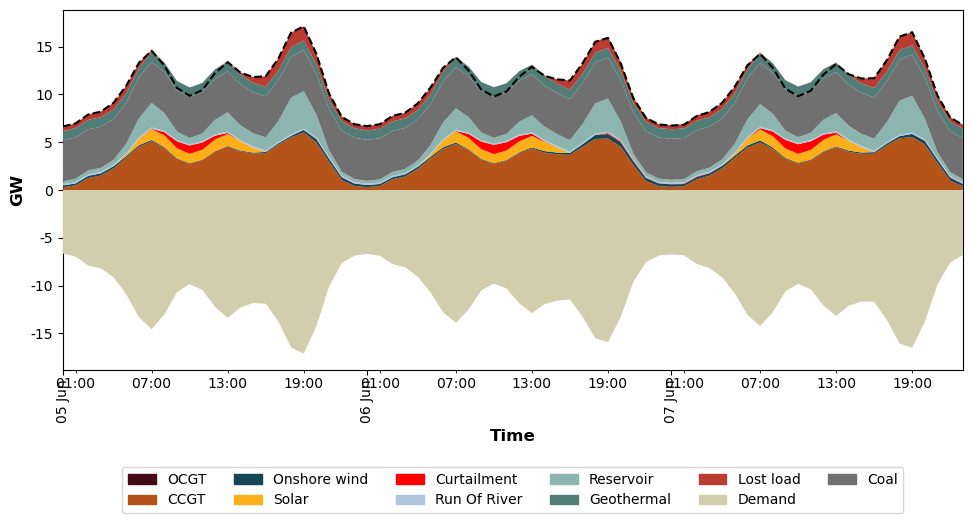

                   p_nom     p_nom_opt
carrier                               
CCGT        1.192700e+03  6.199987e+03
OCGT        1.850000e+02  1.850000e+02
coal        6.000000e+02  4.299999e+03
geothermal  1.350000e+02  9.950000e+02
load        6.700000e+10  6.700000e+10
onwind      9.110670e-01  1.370000e+03
ror         6.017862e+02  6.017862e+02
solar       1.447219e+01  3.000000e+03

hydro storage : p_nom: 4340.625971594  p_nom_opt: 4340.625971594
Empty DataFrame
Columns: [p_nom, p_nom_opt]
Index: []


In [40]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import matplotlib.dates as mdates

first_date = "2013-06-05"
second_date = "2013-06-07"

#Hourly solar curtailment calculation
maximum_solar_generation = model.generators_t.p_max_pu.loc[first_date:second_date].filter(regex='solar') * model.generators.loc[[idx for idx in model.generators.index if 'solar' in idx]]['p_nom_opt']
maximum_solar_generation = maximum_solar_generation.sum(axis=1)
solar_generation = model.generators_t.p.loc[first_date:second_date].groupby(model.generators.carrier, axis=1).sum()["solar"]
curtailment_solar = maximum_solar_generation - solar_generation

#Hourly wind curtailment calculation
maximum_wind_generation = model.generators_t.p_max_pu.loc[first_date:second_date].filter(regex='onwind') * model.generators.loc[[idx for idx in model.generators.index if 'onwind' in idx]]['p_nom_opt']
maximum_wind_generation = maximum_wind_generation.sum(axis=1)
wind_generation = model.generators_t.p.loc[first_date:second_date].groupby(model.generators.carrier, axis=1).sum()["onwind"]
curtailment_wind = maximum_wind_generation- wind_generation

curtailment = curtailment_solar.loc[first_date:second_date] + curtailment_wind.loc[first_date:second_date]

#Hourly generation per technology
OCGT = model.generators_t.p.loc[first_date:second_date].groupby(model.generators.carrier, axis=1).sum()["OCGT"]
Onwind = model.generators_t.p.loc[first_date:second_date].groupby(model.generators.carrier, axis=1).sum()["onwind"]
solar = model.generators_t.p.loc[first_date:second_date].groupby(model.generators.carrier, axis=1).sum()["solar"]


#LoadShedding
load = model.generators_t.p.loc[first_date:second_date].groupby(model.generators.carrier, axis=1).sum()["load"]

#Hourly load/demand 
demand = model.loads_t.p_set.loc[first_date:second_date].sum(axis=1)*-1

size = OCGT.shape[0]

if "ror" in model.generators_t.p.loc[first_date:second_date].groupby(model.generators.carrier, axis=1).sum().columns:
    ror = model.generators_t.p.loc[first_date:second_date].groupby(model.generators.carrier, axis=1).sum()["ror"]
else:
    ror = np.zeros(size)
    

    
if "CCGT" in model.generators_t.p.loc[first_date:second_date].groupby(model.generators.carrier, axis=1).sum().columns:
    CCGT = model.generators_t.p.loc[first_date:second_date].groupby(model.generators.carrier, axis=1).sum()["CCGT"]
else:
    CCGT = np.zeros(size)

if "load" in model.generators_t.p.loc[first_date:second_date].groupby(model.generators.carrier, axis=1).sum().columns:
    load = model.generators_t.p.loc[first_date:second_date].groupby(model.generators.carrier, axis=1).sum()["load"]/1000
else:
    load = np.zeros(size)

if "coal" in model.generators_t.p.loc[first_date:second_date].groupby(model.generators.carrier, axis=1).sum().columns:
    coal = model.generators_t.p.loc[first_date:second_date].groupby(model.generators.carrier, axis=1).sum()["coal"]

if not model.storage_units_t.p.loc[first_date:second_date].sum(axis=1).empty:
    reservoir = model.storage_units_t.p.loc[first_date:second_date].sum(axis=1)
else:
    reservoir = np.zeros(size)
    
if "geothermal" in model.generators_t.p.loc[first_date:second_date].groupby(model.generators.carrier, axis=1).sum().columns:
    geothermal = model.generators_t.p.loc[first_date:second_date].groupby(model.generators.carrier, axis=1).sum()["geothermal"]
else:
    geothermal = np.zeros(size)



# create a figure with a single subplot
fig, ax = plt.subplots(figsize=(12, 4))

# adjust the position of the subplot so that it only takes up 2/3 of the available space
ax.set_position([0.1, 0.1, 0.75, 0.9])

model.carriers.color['geothermal'] = teal3
model.carriers.color['ror'] = teal4
model.carriers.color['hydro'] = teal4
model.carriers.color['coal'] = "#707070"
model.carriers.color['CCGT'] = brown2
model.carriers.color['OCGT'] = brown
#model.carriers.color['oil'] = beige1
model.carriers.color['onwind'] = teal2
model.carriers.color['solar'] = yellow
OCGT_color=brown
CCGT_color=brown2
Onwind_color=teal2
Solar_color=yellow
curtailment_color = 'red'
ror_color='lightsteelblue'
reservoir_color=teal4
coal_color="#707070"

demand_color=beige3
geothermal_color = teal3
lostload_color = red2

A = plt.stackplot(OCGT.index, OCGT, CCGT, Onwind, solar, curtailment, ror,reservoir, coal,  geothermal,load,
colors=[OCGT_color,CCGT_color,Onwind_color,Solar_color,curtailment_color,ror_color,reservoir_color,coal_color,geothermal_color,lostload_color], zorder = 3)
plt.stackplot(OCGT.index,demand, colors=[demand_color], zorder = 3)
plt.xticks(rotation = 90)
plt.yticks()
scale_y = 1e3
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)
# Set the x-axis major formatter to display days and months
myFmt = mdates.DateFormatter('%d %b')  # Example: "07 May"
ax.xaxis.set_major_formatter(myFmt)

# Set the x-axis minor formatter to display hours
hourFmt = mdates.DateFormatter('%H:%M')  # Example: "14:00"
ax.xaxis.set_minor_formatter(hourFmt)
ax.xaxis.set_major_locator(mdates.DayLocator())  # Major ticks for each day
ax.xaxis.set_minor_locator(mdates.HourLocator(interval=6))  # Minor ticks every 6 hours
ax.set_xlim(pd.Timestamp("2013-06-05 00:00"), pd.Timestamp("2013-06-07 23:00"))
ax.set_ylabel('GW',fontsize=12,fontweight='bold')
ax.set_xlabel('Time', fontsize=12,fontweight='bold')

OCGT_patch = mpatches.Patch(color=OCGT_color, label ='OCGT')
CCGT_patch = mpatches.Patch(color=CCGT_color, label ='CCGT')
wind_patch = mpatches.Patch(color=Onwind_color, label ='Onshore wind')
solar_patch = mpatches.Patch(color=Solar_color, label ='Solar')
curtailment_patch = mpatches.Patch(color=curtailment_color, label = 'Curtailment')
ror_patch = mpatches.Patch(color=ror_color, label ='Run Of River')
reservoir_patch = mpatches.Patch(color=reservoir_color, label ='Reservoir')

load_patch = mpatches.Patch(color=demand_color, label ='Demand')
geothermal_patch = mpatches.Patch(color=geothermal_color, label ='Geothermal')
lostload_patch = mpatches.Patch(color=lostload_color, label ='Lost load')
coal_patch = mpatches.Patch(color=coal_color, label ='Coal')

handles=[OCGT_patch,CCGT_patch,wind_patch,solar_patch,curtailment_patch,ror_patch,reservoir_patch,geothermal_patch,lostload_patch,load_patch,coal_patch]

ax.legend(handles=handles, ncol=6, loc="upper center", bbox_to_anchor=(0.5, -0.25))

image_format = 'eps' # e.g .png, .svg, etc.

demand = model.loads_t.p_set.loc[first_date:second_date].sum(axis=1)

# Plot the demand as a time series
plt.plot(demand.abs(), color="black", label="abs(withdrawal)", linestyle="dashed", zorder=100)
#fig.savefig(r'C:\Users\Carlos\Desktop\satand_alone_transition.eps', format=image_format, dpi=1200)

plt.show()

gen_cap = model.generators.groupby(["carrier"]).sum()
sto_cap = model.links.groupby(["carrier"]).sum()
print(gen_cap[['p_nom','p_nom_opt']])
print('\nhydro storage : p_nom: ' + str(model.storage_units.sum()['p_nom'])+ '  p_nom_opt: '+str(model.storage_units.sum()['p_nom_opt']))
print(sto_cap[['p_nom','p_nom_opt']])

c:\Users\hie\AppData\Local\anaconda3\envs\pypsa-earth\lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning:

facecolor will have no effect as it has been defined as "never".



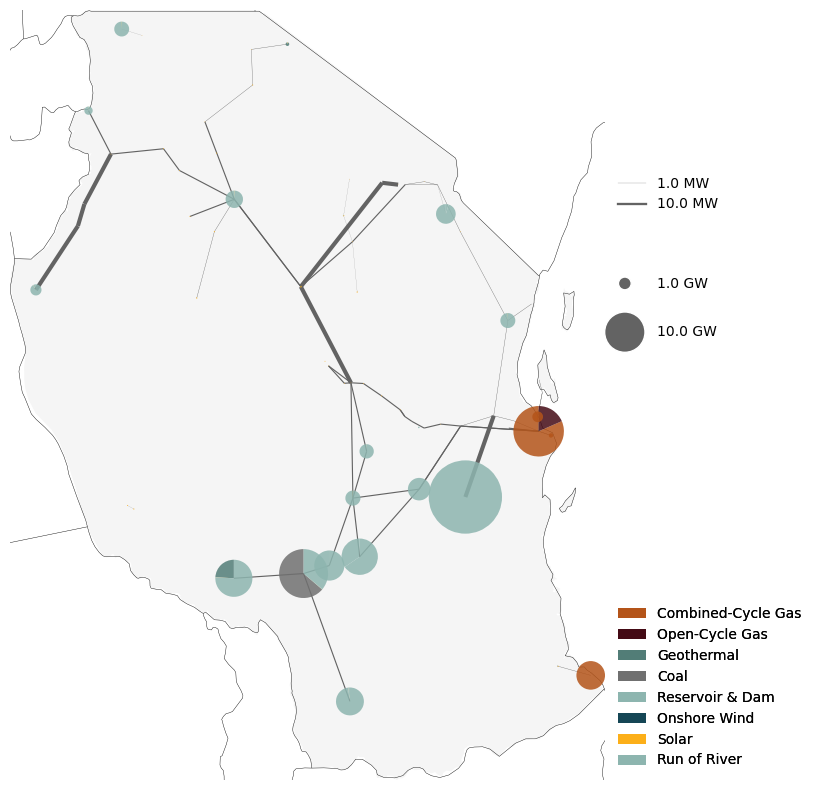

In [36]:
# CURRENT SYSTEM##
# # Filter carriers to include only those present in the model
present_carriers = set(model.generators.carrier.unique()).union(model.storage_units.carrier.unique())
filtered_carriers = model.carriers[model.carriers.index.isin(present_carriers)]

# Scale settings
bus_scale = 6e3 
line_scale = 6e2

# Legend settings
bus_sizes = [100, 1000]  # in MW
line_sizes = [100, 1000]  # in MW

#model.carriers.drop("load", inplace=True)
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={"projection": ccrs.EqualEarth(model.buses.x.mean())})
gen = model.generators[model.generators.carrier != "load"].groupby(["bus", "carrier"]).p_nom.sum()
sto = model.storage_units.groupby(["bus", "carrier"]).p_nom.sum()
buses = pd.concat([gen, sto])

with plt.rc_context({"patch.linewidth": 0.}):
    model.plot(
        bus_sizes=buses / bus_scale,
        bus_alpha=0.85,
        line_widths=model.lines.s_nom / line_scale,
        link_widths=model.links.p_nom / line_scale,
        line_colors="#636363",
        ax=ax,
        margin=0.2,
        color_geomap=None,
    )
regions_onshore.plot(
    ax=ax,
    facecolor="whitesmoke",
    edgecolor="white",
    aspect="equal",
    transform=ccrs.PlateCarree(),
    linewidth=0,
)
ax.set_extent(regions_onshore.total_bounds[[0, 2, 1, 3]])
legend_kwargs = {"loc": "upper left", "frameon": False}
legend_circles_dict = {"bbox_to_anchor": (1, 0.67), "labelspacing": 2.5, **legend_kwargs}

# Add legend circles with custom colors using patch_kw
add_legend_circles(
    ax,
    [s / bus_scale for s in bus_sizes],
    [f"{s / 100} GW" for s in bus_sizes],
    legend_kw=legend_circles_dict,
    patch_kw={"facecolor": "#636363", "edgecolor": "white"}  # Custom colors
)

add_legend_lines(
    ax,
    [s / line_scale for s in line_sizes],
    [f"{s / 100} MW" for s in line_sizes],
    legend_kw={"bbox_to_anchor": (1, 0.8), **legend_kwargs},
    patch_kw={"color": "#636363"},  # Custom colors
)
add_legend_patches(
    ax,
    filtered_carriers.color,
    filtered_carriers.nice_name,
    legend_kw={"bbox_to_anchor": (1, 0), **legend_kwargs, "loc":"lower left"},
)
fig.tight_layout()

C:\Users\hie\AppData\Local\Temp\ipykernel_25036\276052585.py:2: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\hie\AppData\Local\Temp\ipykernel_25036\276052585.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of 

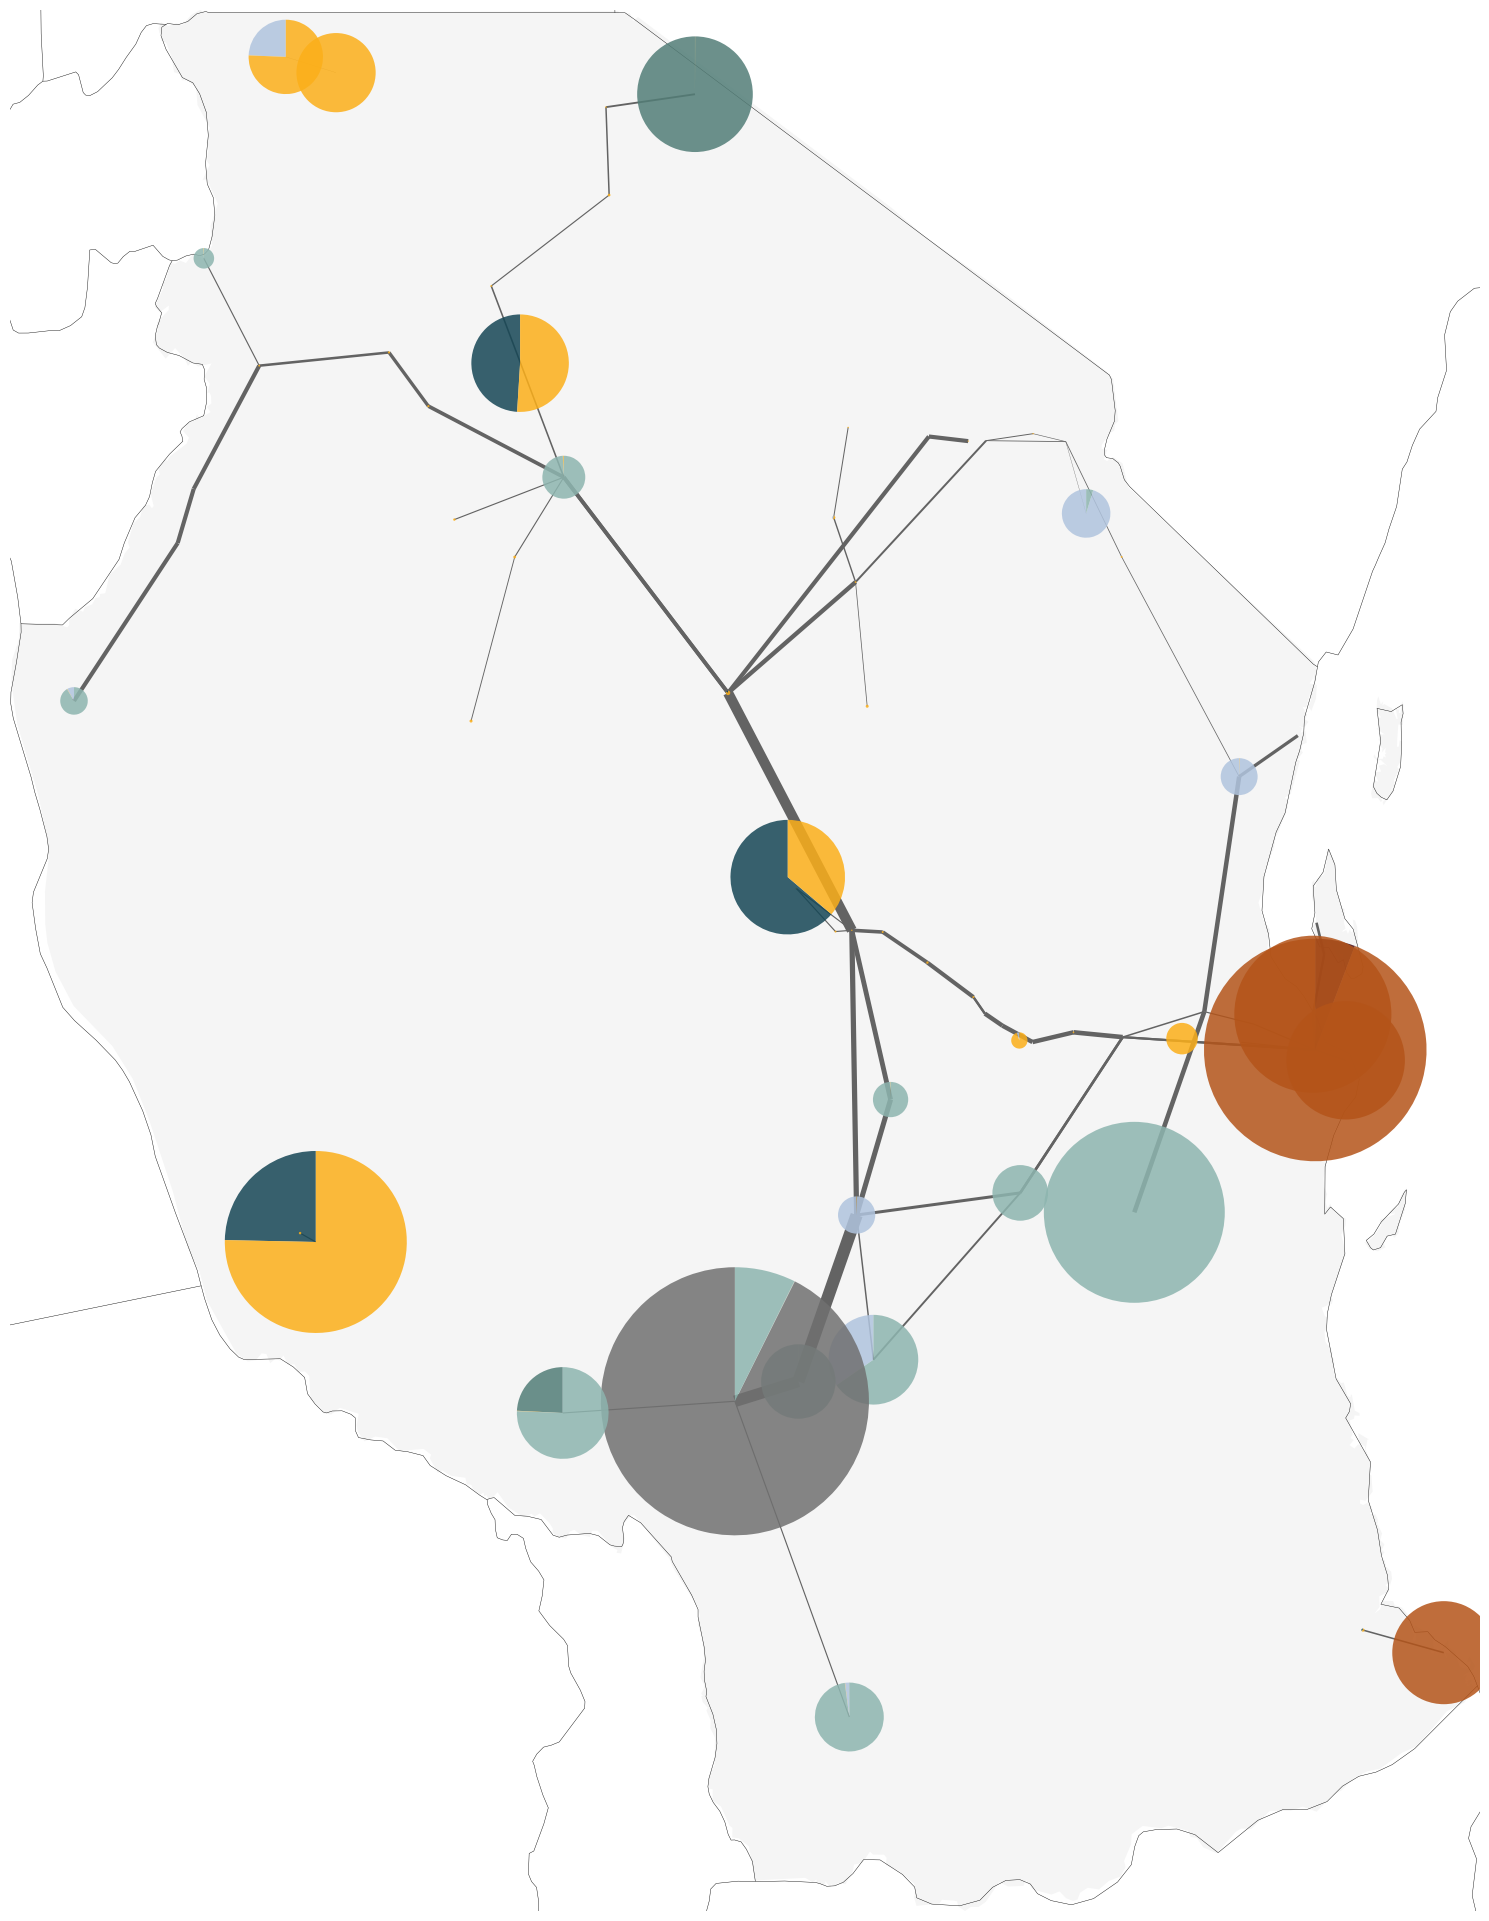

In [37]:
##FUTURE OPTIMIZED SYSTEM###
model.carriers.color['geothermal'] = teal3
model.carriers.color['ror'] = 'lightsteelblue'
model.carriers.color['hydro'] = teal4
model.carriers.color['coal'] = "#707070"
model.carriers.color['CCGT'] = brown2
model.carriers.color['OCGT'] = brown
#model.carriers.color['oil'] = beige1
model.carriers.color['onwind'] = teal2
model.carriers.color['solar'] = yellow
#model.carriers.color['biomass'] = teal3
#model.carriers

# Filter carriers to include only those present in the model
present_carriers = set(model.generators.carrier.unique()).union(model.storage_units.carrier.unique())
filtered_carriers = model.carriers[model.carriers.index.isin(present_carriers)]

# Plot the network
#fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={"projection": ccrs.EqualEarth(model.buses.x.mean())})
gen = model.generators[model.generators.carrier != "load"].groupby(["bus", "carrier"]).p_nom_opt.sum()
sto = model.storage_units.groupby(["bus", "carrier"]).p_nom_opt.sum()
buses = pd.concat([gen, sto])

# Scale settings
bus_scale = 6e3 
line_scale = 6e2
# Plot the network
fig, ax = plt.subplots(figsize=(15, 20), subplot_kw={"projection": ccrs.EqualEarth(model.buses.x.mean())})

# Plot the network
with plt.rc_context({"patch.linewidth": 0.}):
    model.plot(
        bus_sizes=buses / bus_scale,
        bus_alpha=0.85,
        line_widths=model.lines.s_nom_opt / line_scale,
        link_widths=model.links.p_nom_opt / line_scale,
        line_colors='#636363',
        ax=ax,
        margin=0.2,
        color_geomap=None,
    )

# Plot regions
regions_onshore.plot(
    ax=ax,
    facecolor="whitesmoke",
    edgecolor="white",
    aspect="equal",
    transform=ccrs.PlateCarree(),
    linewidth=0,
)

# Set extent
ax.set_extent(regions_onshore.total_bounds[[0, 2, 1, 3]])

# Add legend circles with proper labels
# legend_circles_dict = {"bbox_to_anchor": (1, 0.67), "labelspacing": 2.5, "loc": "upper left", "frameon": False}
# add_legend_circles(
#     ax,
#     [s / bus_scale for s in bus_sizes],
#     [f"{s / 1000} GW" for s in bus_sizes],  # Proper labels in GW
#     legend_kw=legend_circles_dict,
#     patch_kw={"facecolor": "teal", "edgecolor": "white"}  # Custom colors
# )

#Add legend lines with proper labels
# add_legend_lines(
#     ax,
#     [s / line_scale for s in line_sizes],
#     [f"{s / 1000} GW" for s in line_sizes],  # Proper labels in GW
#     legend_kw={"bbox_to_anchor": (1, 0.8), "loc": "upper left", "frameon": False},
# )

# Add legend patches for filtered carriers
# add_legend_patches(
#     ax,
#     filtered_carriers.color,
#     filtered_carriers.nice_name,
#     legend_kw={"bbox_to_anchor": (1, 0), "loc": "lower left", "frameon": False},
# )

# Finalize the plot
fig.tight_layout()
plt.show()

C:\Users\hie\AppData\Local\Temp\ipykernel_25036\1522018189.py:4: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\hie\AppData\Local\Temp\ipykernel_25036\1522018189.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy o

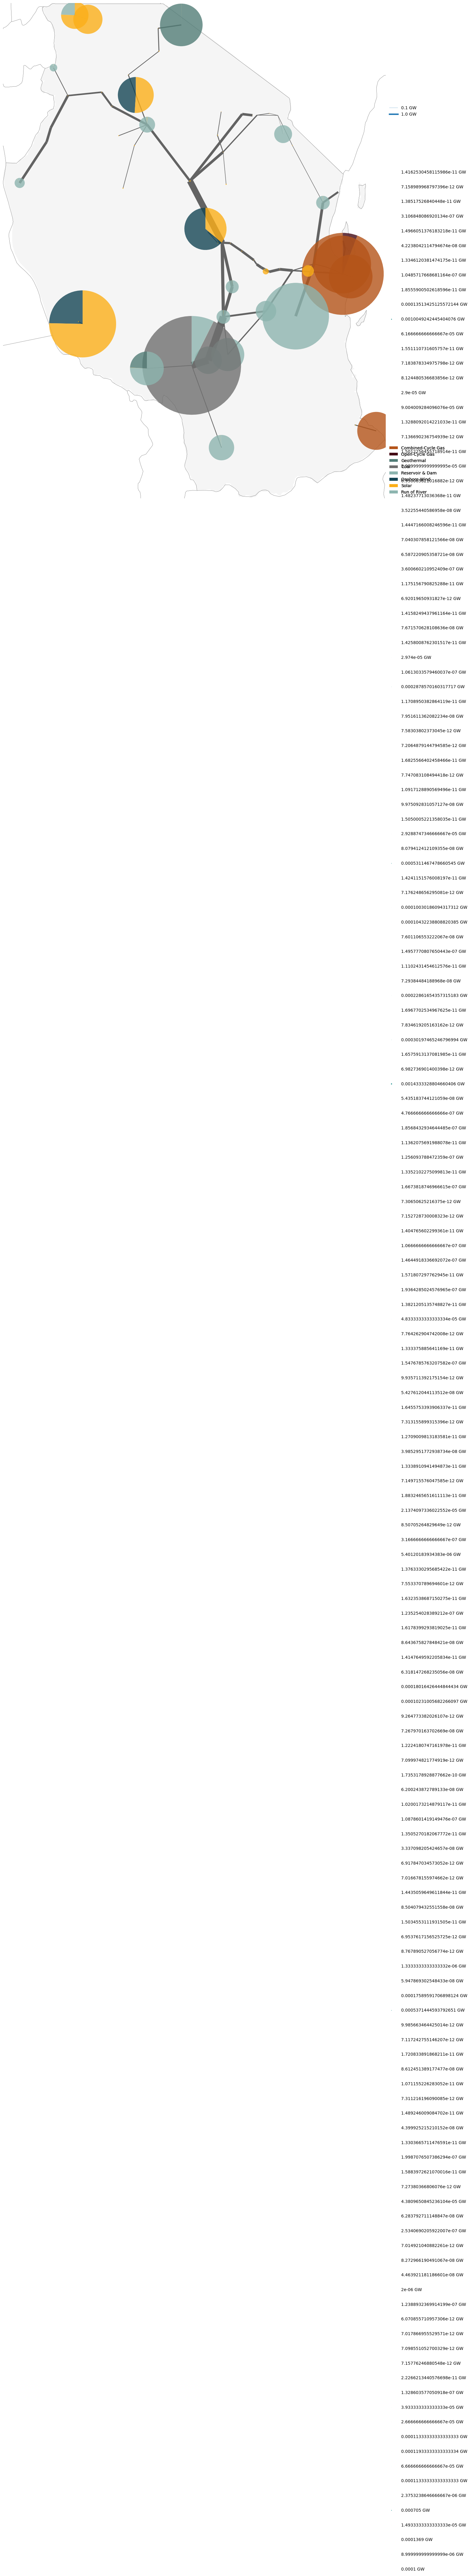

In [38]:
if 'Load' in model.carriers.index:
    model.carriers = model.carriers.drop(index='Load')
#model.carriers.color = [beige3, beige2, teal3, brown2, beige1, teal2, teal4, yellow, teal2, brown]
model.carriers.color['geothermal'] = teal3
model.carriers.color['ror'] = teal4
model.carriers.color['hydro'] = teal4
model.carriers.color['coal'] = "#707070"
model.carriers.color['CCGT'] = brown2
model.carriers.color['OCGT'] = brown
#model.carriers.color['oil'] = beige1
model.carriers.color['onwind'] = teal2
model.carriers.color['solar'] = yellow
#model.carriers.color['biomass'] = teal3
model.carriers

# Legend settings
bus_sizes = [100, 1000]  # in MW
line_sizes = [100, 1000]  # in MW 
 
bus_scale = 3e3
line_scale = 3e2
 
from pypsa.plot import add_legend_circles, add_legend_lines, add_legend_patches
 
regions_onshore = gpd.read_file("C:/Users/hie/pe_tan/pypsa-earth/resources/2040_s2/shapes/country_shapes.geojson")
 
fig, ax = plt.subplots(figsize=(15, 20), subplot_kw={"projection": ccrs.EqualEarth(model.buses.x.mean())})
# Filter carriers to include only those present in the system
present_carriers = set(model.generators.carrier.unique()).union(model.storage_units.carrier.unique())
filtered_carriers = model.carriers[model.carriers.index.isin(present_carriers)]

# Remove carriers containing 'load' from the filtered carriers
filtered_carriers = filtered_carriers[~filtered_carriers.index.str.contains('load')]

# Group by 'bus' and 'carrier' and sum 'p_nom_opt'
gen = model.generators[model.generators.carrier.isin(filtered_carriers.index)]
gen = gen.groupby(["bus", "carrier"]).p_nom_opt.sum()

# Group storage units by 'bus' and 'carrier' and sum 'p_nom_opt'
sto = model.storage_units[model.storage_units.carrier.isin(filtered_carriers.index)]
sto = sto.groupby(["bus", "carrier"]).p_nom_opt.sum()
# Combine generator and storage data
buses = pd.concat([gen, sto])

# Normalize bus sizes
bus_sizes = buses / bus_scale

# Plot the network
with plt.rc_context({"patch.linewidth": 0.}):
    model.plot(
        bus_sizes=buses / bus_scale,
        bus_alpha=0.8,
        line_widths=model.lines.s_nom_opt / line_scale,
        link_widths=model.links.p_nom_opt / line_scale,
        line_colors='#636363',
        ax=ax,
        margin=0.2,
        color_geomap=None,
    )

# Plot regions
regions_onshore.plot(
    ax=ax,
    facecolor="whitesmoke",
    edgecolor="white",
    aspect="equal",
    transform=ccrs.PlateCarree(),
    linewidth=0,
)

# Set extent and add legends
ax.set_extent(regions_onshore.total_bounds[[0, 2, 1, 3]])
legend_kwargs = {"loc": "upper left", "frameon": False}
legend_circles_dict = {"bbox_to_anchor": (1, 0.67), "labelspacing": 2.5, **legend_kwargs}
add_legend_circles(
    ax,
    [s / bus_scale for s in bus_sizes],
    [f"{s / 1000} GW" for s in bus_sizes],
    legend_kw=legend_circles_dict,
    patch_kw={"facecolor": "teal", "edgecolor": "white"}  # Custom colors
)

add_legend_lines(
    ax,
    [s / line_scale for s in line_sizes],
    [f"{s / 1000} GW" for s in line_sizes],
    legend_kw={"bbox_to_anchor": (1, 0.8), **legend_kwargs},
    #patch_kw={"facecolor": "teal"},  # Custom colors
)
add_legend_patches(
    ax,
    filtered_carriers.color,
    filtered_carriers.nice_name,
    legend_kw={"bbox_to_anchor": (1, 0), **legend_kwargs, "loc": "lower left"},
)

fig.tight_layout()
#plt.show()

In [39]:
# Calculate optimal and installed capacities for generators
optimal_capacity_generators = model.statistics.optimal_capacity(comps=["Generator"]).droplevel(0).div(1e3)
installed_capacity_generators = model.statistics.installed_capacity(comps=["Generator"]).droplevel(0).div(1e3)

# Calculate optimal and installed capacities for storage units
optimal_capacity_storage = model.statistics.optimal_capacity(comps=["StorageUnit"]).droplevel(0).div(1e3)
installed_capacity_storage = model.statistics.installed_capacity(comps=["StorageUnit"]).droplevel(0).div(1e3)

# Combine generator and storage capacities
optimal_capacity = pd.concat([optimal_capacity_generators, optimal_capacity_storage]).groupby(level=0).sum()
installed_capacity = pd.concat([installed_capacity_generators, installed_capacity_storage]).groupby(level=0).sum()

# Calculate capacity expansion
generation_capacity_expansion = optimal_capacity - installed_capacity
generation_capacity_expansiomodel.drop(["load"], inplace=True, errors="ignore")  # Drop "load" if it exists

# Plot the capacity expansion
generation_capacity_expansiomodel.plot.bar(title="")
plt.ylabel("GW")
plt.xlabel("")
plt.show()

NameError: name 'generation_capacity_expansiomodel' is not defined

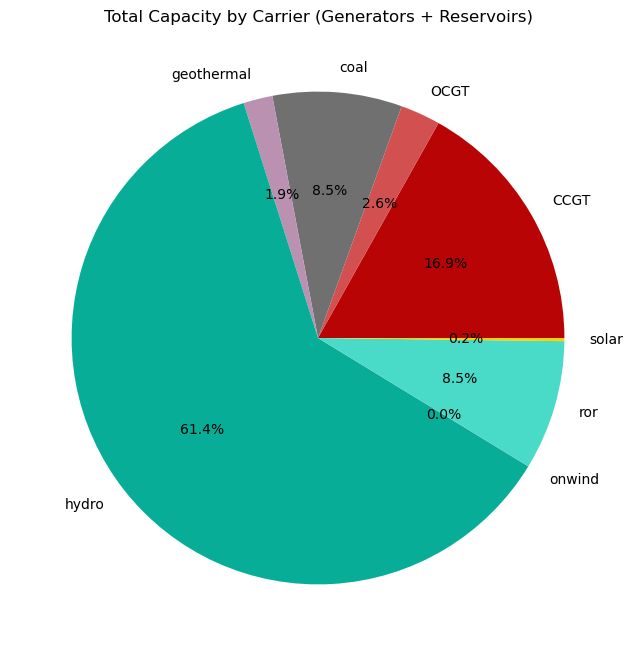

In [ ]:
#Current capacity
# Combine generator and reservoir capacities
generator_capacity_by_carrier = (
    model.generators[model.generators.carrier != "load"]
    .groupby(["carrier"])
    .p_nom.sum()
)

reservoir_capacity_by_carrier = (
    model.storage_units[model.storage_units.carrier != "load"]
    .groupby(["carrier"])
    .p_nom.sum()
)

# Combine both capacities into a single DataFrame
total_capacity_by_carrier = (
    pd.concat([generator_capacity_by_carrier, reservoir_capacity_by_carrier])
    .groupby(level=0)
    .sum()
)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    total_capacity_by_carrier,
    labels=total_capacity_by_carrier.index,
    autopct='%1.1f%%',
    colors=model.carriers[
        model.carriers.index.isin(total_capacity_by_carrier.index)
    ].color.reindex(total_capacity_by_carrier.index)
)
plt.title("Total Capacity by Carrier (Generators + Reservoirs)")
plt.show()

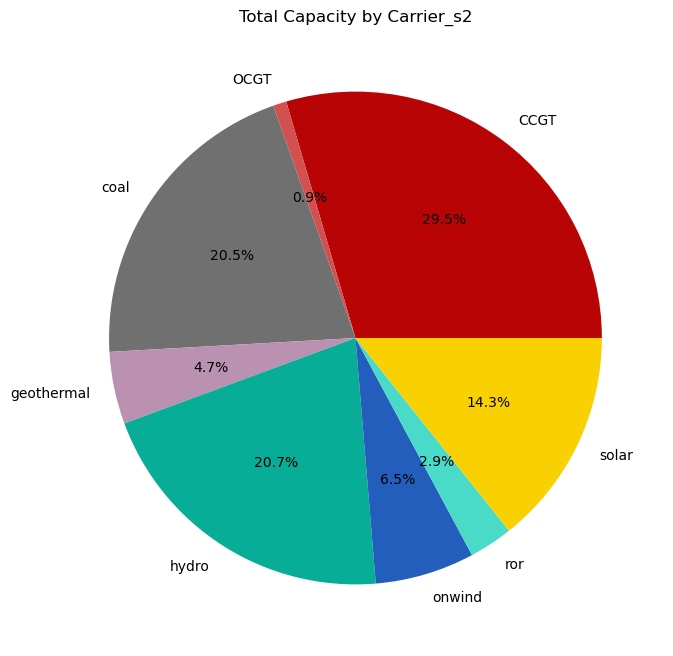

In [ ]:
#future capacity
# Combine generator and reservoir capacities
generator_capacity_by_carrier = (
    model.generators[model.generators.carrier != "load"]
    .groupby(["carrier"])
    .p_nom_opt.sum()
)

reservoir_capacity_by_carrier = (
    model.storage_units[model.storage_units.carrier != "load"]
    .groupby(["carrier"])
    .p_nom_opt.sum()
)

# Combine both capacities into a single DataFrame
total_capacity_by_carrier = (
    pd.concat([generator_capacity_by_carrier, reservoir_capacity_by_carrier])
    .groupby(level=0)
    .sum()
)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    total_capacity_by_carrier,
    labels=total_capacity_by_carrier.index,
    autopct='%1.1f%%',
    colors=model.carriers[
        model.carriers.index.isin(total_capacity_by_carrier.index)
    ].color.reindex(total_capacity_by_carrier.index)
)
plt.title("Total Capacity by Carrier_s2")
plt.show()
